In [228]:
from openpyxl import load_workbook
wb = load_workbook('GradeWiseQuota.xlsx', data_only=True)
sheet = wb['Sheet1']


In [229]:
# Vacancy information
total_posts = {
    "Goods Guard": sheet['D10'].value,
    "Sr. Goods Guard & Co": sheet['D9'].value, #MAIL EXP/Sr.PASS/Sr.GOODS TRAIN MANAGERS  - Sr, Goods Guard & Co
    "Pointman A": sheet['D21'].value,
    "Pointman B": sheet['D22'].value,
    "Section Controller": sheet['D16'].value,
    "Chief Controller": sheet['D14'].value,
    "Station Superintendent": sheet['D2'].value,
    "Station Master": sheet['D4'].value
}

occupied_posts = {
    "Goods Guard": sheet['E10'].value,
    "Sr. Goods Guard & Co": sheet['E9'].value,
    "Pointman A": sheet['E21'].value,
    "Pointman B": sheet['E22'].value,
    "Section Controller": sheet['E16'].value,
    "Chief Controller": sheet['E14'].value,
    "Station Superintendent": sheet['E2'].value,
    "Station Master": sheet['E4'].value
}

# Calculate vacancies by subtracting occupied posts from total posts + vacancy created due to promotion
vacancies = {
    "Goods Guard": total_posts["Goods Guard"] - occupied_posts["Goods Guard"],
    "Sr. Goods Guard & Co": total_posts['Sr. Goods Guard & Co'] - occupied_posts['Sr. Goods Guard & Co'],
    "Pointman A": total_posts["Pointman A"] - occupied_posts['Pointman A'],
    "Pointman B": total_posts['Pointman B'] - occupied_posts["Pointman B"], #sheet['F22'].value
    "Section Controller": total_posts['Section Controller'] - occupied_posts['Section Controller'], #sheet['F16'].value,
    "Chief Controller": total_posts['Chief Controller'] - occupied_posts['Chief Controller'], #sheet['F14'].value
    "Station Superintendent": total_posts["Station Superintendent"] - occupied_posts['Station Superintendent'],
    "Station Master": total_posts['Station Master'] - occupied_posts['Station Master']
}

print(vacancies)

{'Goods Guard': -15, 'Sr. Goods Guard & Co': 35, 'Pointman A': 328, 'Pointman B': -371, 'Section Controller': 0, 'Chief Controller': 9, 'Station Superintendent': 12, 'Station Master': -1}


In [247]:
'''

import random

# Assuming you have the total_posts and occupied_posts dictionaries

# Define the vacancy probabilities for each post (example values)
retirement_probabilities = {
    "Goods Guard": 0.1,
    "Sr. Goods Guard & Co": 0.15,
    "Pointman A": 0.2,
    "Pointman B": 0.25,
    "Section Controller": 0.12,
    "Chief Controller": 0.08,
    "Station Superintendent": 0.18,
    "Station Master": 0.1
}

# Define the retirement, resignation, and transfer probabilities for each post (example values)
transfer_probabilities = {
    "Goods Guard": 0.05,
    "Sr. Goods Guard & Co": 0.03,
    "Pointman A": 0.02,
    "Pointman B": 0.04,
    "Section Controller": 0.06,
    "Chief Controller": 0.04,
    "Station Superintendent": 0.03,
    "Station Master": 0.05
}

resignation_probabilities = {
    "Goods Guard": 0.02,
    "Sr. Goods Guard & Co": 0.01,
    "Pointman A": 0.03,
    "Pointman B": 0.02,
    "Section Controller": 0.04,
    "Chief Controller": 0.03,
    "Station Superintendent": 0.01,
    "Station Master": 0.02
}

vacancy_probabilities = {
    "Goods Guard": 0.08,
    "Sr. Goods Guard & Co": 0.06,
    "Pointman A": 0.05,
    "Pointman B": 0.03,
    "Section Controller": 0.04,
    "Chief Controller": 0.02,
    "Station Superintendent": 0.06,
    "Station Master": 0.04
}

# Create the vacancies dictionary using Monte Carlo simulation
vacancies_MonteCarlo = {}
for post, total_posts_count in total_posts.items():
    occupied_posts_count = occupied_posts.get(post, 0)
    vacancy_probability = vacancy_probabilities.get(post, 0)
    retirement_probability = retirement_probabilities.get(post, 0)
    resignation_probability = resignation_probabilities.get(post, 0)
    transfer_probability = transfer_probabilities.get(post, 0)

    # Calculate the maximum number of vacancies based on the available posts
    max_vacancies_count = total_posts_count - occupied_posts_count

    # Calculate the number of vacancies based on the probabilities
    vacancies_count = int(max_vacancies_count * vacancy_probability)

    # Introduce randomness using random numbers within the specified probabilities
    for _ in range(vacancies_count):
        if random.random() <= retirement_probability:
            max_vacancies_count -= 1
        if random.random() <= resignation_probability:
            max_vacancies_count -= 1
        if random.random() <= transfer_probability:
            max_vacancies_count -= 1

    vacancies_MonteCarlo[post] = max(max_vacancies_count, 0)
    vacancies[post] = vacancies.get(post, 0) + max(max_vacancies_count, 0)

print(vacancies_MonteCarlo)
print(vacancies)

'''


{'Goods Guard': 0, 'Sr. Goods Guard & Co': 35, 'Pointman A': 324, 'Pointman B': 0, 'Section Controller': 0, 'Chief Controller': 9, 'Station Superintendent': 12, 'Station Master': 0}
{'Goods Guard': -15, 'Sr. Goods Guard & Co': 661, 'Pointman A': 6165, 'Pointman B': -371, 'Section Controller': 0, 'Chief Controller': 171, 'Station Superintendent': 228, 'Station Master': -1}


In [201]:
section_controller_promoted = vacancies['Chief Controller'] * 1 #100% of the vacancies are filled from section conntroller based on Seniority
section_controller_promoted_vacancy = section_controller_promoted * 1
vacancies['Section Controller'] += section_controller_promoted_vacancy
vacancies['Chief Controller'] = 0

print(vacancies)

{'Goods Guard': -15, 'Sr. Goods Guard & Co': 35, 'Pointman A': 328, 'Pointman B': -371, 'Section Controller': 9, 'Chief Controller': 0, 'Station Superintendent': 12, 'Station Master': -1}


In [202]:
def calculate_needed_positions(vacancies, percentage):
   return round(vacancies * percentage)

In [203]:
def calculate_people_needed_SectionController(vacancies):
    general_selection_percentages = {
        "SM_YM_ShuntingMaster": 0.45,  # Combined SM, YM, and Shunting Master categories
        "Goods_PassGuard": 0.30,  # Combined Goods Guard and Passenger Guard categories
    }

    ldce_percentages = {
        "LDCE": 0.15,
    }

    dr_percentages = {
        "DR": 0.15,  # Direct Recruitment + Shortfall Against LDCE
    }

    # Calculate the number of people needed from LDCE Traffic Apprentice category
    ldce_needed = calculate_needed_positions(vacancies["Section Controller"], ldce_percentages["LDCE"])

    # Calculate the number of people needed from Direct Recruitment
    dr_needed = calculate_needed_positions(vacancies["Section Controller"], dr_percentages["DR"])

    # Calculate the number of people needed from SM, YM, and Shunting Master categories
    sm_ym_shunting_needed = calculate_needed_positions(vacancies["Section Controller"], general_selection_percentages["SM_YM_ShuntingMaster"])

    # Calculate the number of people needed from Goods Guard and Passenger Guard categories
    goods_pass_guard_needed = calculate_needed_positions(vacancies["Section Controller"], general_selection_percentages["Goods_PassGuard"])

    # Calculate the total number of people needed for the new Controller positions
    total_people_needed = ldce_needed + dr_needed + sm_ym_shunting_needed + goods_pass_guard_needed

    return {
        "LDCE Controller": ldce_needed,
        "Direct Recruitment Controller": dr_needed,
        "SM_YM_ShuntingMaster": sm_ym_shunting_needed,
        "Goods_PassGuard": goods_pass_guard_needed,
        # "Total_Controller": total_people_needed,
    }


controller_people_needed = calculate_people_needed_SectionController(vacancies)
print(controller_people_needed)


{'LDCE Controller': 1, 'Direct Recruitment Controller': 1, 'SM_YM_ShuntingMaster': 4, 'Goods_PassGuard': 3}


In [204]:
#Updating vacancies
vacancies['Station Master'] += controller_people_needed['SM_YM_ShuntingMaster']
vacancies['Passenger Guard'] = round (controller_people_needed['Goods_PassGuard'] / 2)
vacancies['Goods Guard'] += (controller_people_needed['Goods_PassGuard'] - vacancies['Passenger Guard'])

print(vacancies)

{'Goods Guard': -14, 'Sr. Goods Guard & Co': 35, 'Pointman A': 328, 'Pointman B': -371, 'Section Controller': 9, 'Chief Controller': 0, 'Station Superintendent': 12, 'Station Master': 3, 'Passenger Guard': 2}


In [206]:
StationMaster_promoted = vacancies['Station Superintendent']
StationMaster_promoted_vacancy = StationMaster_promoted

vacancies['Station Master'] += StationMaster_promoted_vacancy
vacancies['Station Superintendent'] = 0

#print(vacancies)
print(f"Number of people needed in Station Master position: {vacancies['Station Master']}")

Number of people needed in Station Master position: 15


In [179]:
vacancy_SrGoodsGuard = vacancies['Sr. Goods Guard & Co']
GoodsGuard_promoted = vacancy_SrGoodsGuard * 1 # 100% of vacancies in Mail Exp/Sr. Pass Guard etc are filled by seniority
GoodsGuard_promoted_vacancy = GoodsGuard_promoted # Assuming vacancies left by promotion are filled completely (100%)

#updating Goods Guard
vacancies['Goods Guard'] += GoodsGuard_promoted_vacancy
vacancies['Sr. Goods Guard & Co'] = 0
print(vacancies)


{'Goods Guard': 21, 'Sr. Goods Guard & Co': 0, 'Pointman A': 328, 'Pointman B': -371, 'Section Controller': 9, 'Chief Controller': 0, 'Station Superintendent': 12, 'Station Master': -1, 'SM_YM_ShuntingMaster': 4, 'Passenger Guard': 2}


In [180]:
import matplotlib.pyplot as plt

def calculate_people_needed_GoodsGuard(vacancies):

    general_selection_percentages = {
        "TNC_SrTNC": 0.28,  # Combined TNC and Sr.TNC categories
        "CC": 0.04,
        "P_Cman": 0.28,  # Combined Pointsman and Cabinman categories
    }

    ldce_percentages = {
        "LDCE": 0.15,
    }

    rrb_percentages = {
        "RRB": 0.25,
    }

    # Calculate the number of people needed from LDCE
    ldce_needed = calculate_needed_positions(vacancies["Goods Guard"], ldce_percentages["LDCE"])

    # Calculate the number of people needed from RRB
    rrb_needed = calculate_needed_positions(vacancies["Goods Guard"], rrb_percentages["RRB"])

    # Calculate the number of people needed from TNC and Sr.TNC categories
    tnc_srtnc_needed = calculate_needed_positions(vacancies["Goods Guard"], general_selection_percentages["TNC_SrTNC"])

    # Calculate the number of people needed from the CC category
    cc_needed = calculate_needed_positions(vacancies["Goods Guard"], general_selection_percentages["CC"])

    # Calculate the number of people needed from the Pointsman and Cabinman categories
    p_cman_needed = calculate_needed_positions(vacancies["Goods Guard"], general_selection_percentages["P_Cman"])

    # Calculate the total number of people needed for the new Goods Guard positions
    total_people_needed = ldce_needed + rrb_needed + tnc_srtnc_needed + cc_needed + p_cman_needed

    return {
        "LDCE": ldce_needed,
        "RRB": rrb_needed,
        "TNC_SrTNC": tnc_srtnc_needed,
        "CC": cc_needed,
        "Pointsman_Cabinman": p_cman_needed,
        #"Total_Goods_Guard": total_people_needed,
    }


In [181]:
# Calculate the number of people needed from different categories
guard_people_needed = calculate_people_needed_GoodsGuard(vacancies)

print(f"Number of people needed from LDCE to Goods Guard: {guard_people_needed['LDCE']}")
print(f"Number of people needed from RRB to Goods Guard: {guard_people_needed['RRB']}")
print(f"Number of people needed from TNC and Sr.TNC categories: {guard_people_needed['TNC_SrTNC']}")
print(f"Number of people needed from Commercial Clerk category: {guard_people_needed['CC']}")
print(f"Number of people needed from Pointsman and Cabinman categories: {guard_people_needed['Pointsman_Cabinman']}")
#print(f"Total number of people needed for new Goods Guard positions: {people_needed['Total_Goods_Guard']}")

Number of people needed from LDCE to Goods Guard: 3
Number of people needed from RRB to Goods Guard: 5
Number of people needed from TNC and Sr.TNC categories: 6
Number of people needed from Commercial Clerk category: 1
Number of people needed from Pointsman and Cabinman categories: 6


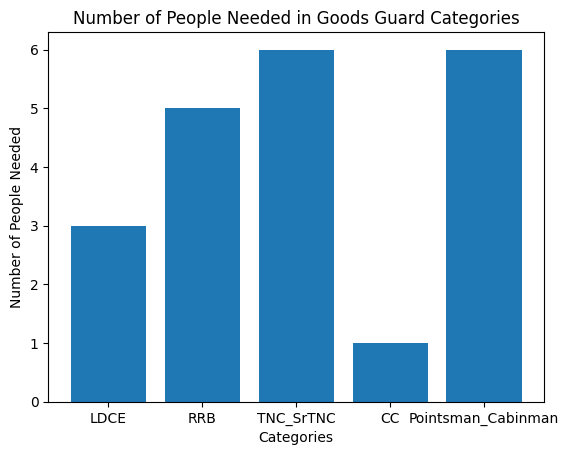

In [182]:
%matplotlib inline

# Extract category names and corresponding values
categories = list(guard_people_needed.keys())
values = list(guard_people_needed.values())

# Plotting the bar graph
plt.bar(categories, values)
plt.xlabel("Categories")
plt.ylabel("Number of People Needed")
plt.title("Number of People Needed in Goods Guard Categories")

# Save the plot as an image file
plt.show()

In [183]:

def calculate_pointman_cabinman_needed(guard_people_needed):
    vacancies_points_cabin = guard_people_needed['Pointsman_Cabinman']
    #pointman_needed = vacancies * 0.5  # Equal distribution between Pointman-A and Pointman-B
    cabinman = vacancies_points_cabin // 2  # No specific information provided for Cabinman vacancies
    pointman_A = vacancies_points_cabin //4
    pointman_B = vacancies_points_cabin - cabinman - pointman_A

    return {
        "Pointman-A": pointman_A,
        "Pointman-B": pointman_B,
        "Cabinman": cabinman,
    }


Number of people needed for Pointman-A: 1
Number of people needed for Pointman-B: 2
Number of people needed for Cabinman: 3
{'Goods Guard': 21, 'Sr. Goods Guard & Co': 0, 'Pointman A': 329, 'Pointman B': -369, 'Section Controller': 9, 'Chief Controller': 0, 'Station Superintendent': 12, 'Station Master': -1, 'SM_YM_ShuntingMaster': 4, 'Passenger Guard': 2, 'Cabinman': 3}


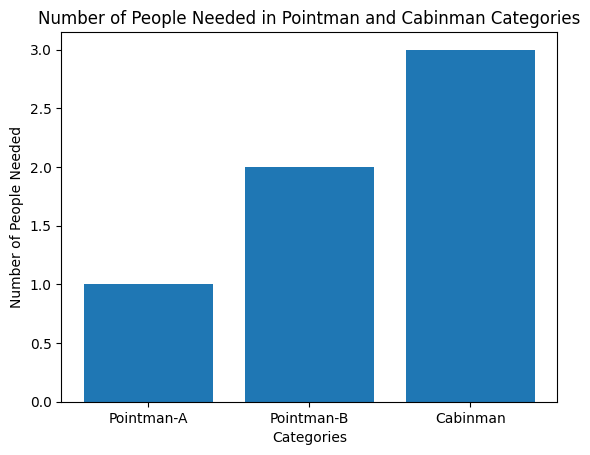

In [184]:

# Calculate the number of people needed for Pointman and Cabinman positions
pointman_cabinman_needed = calculate_pointman_cabinman_needed(guard_people_needed)


for category, count in pointman_cabinman_needed.items():
    print(f"Number of people needed for {category}: {count}")

# Extract category names and corresponding values
categories = list(pointman_cabinman_needed.keys())
values = list(pointman_cabinman_needed.values())

# Plotting the bar graph
plt.bar(categories, values)
plt.xlabel("Categories")
plt.ylabel("Number of People Needed")
plt.title("Number of People Needed in Pointman and Cabinman Categories")

# Save the plot as an image file
#plt.savefig("pointman_cabinman_needed_graph.png")
#print(people_needed)

vacancies['Pointman A'] = vacancies['Pointman A'] + pointman_cabinman_needed['Pointman-A']
vacancies['Pointman B'] = vacancies['Pointman B'] + pointman_cabinman_needed['Pointman-B']
vacancies['Cabinman'] = pointman_cabinman_needed['Cabinman']
print(vacancies)

In [185]:

#From vacancy in pointman-B and also from vacancy created due to promotion in pointman-A
pointman_b_vacancy_promotion = vacancies['Pointman A'] * 1
pointman_b_needed = vacancies['Pointman B'] +  pointman_b_vacancy_promotion

rrb_pointman = pointman_b_needed
print(f"People needed from RRB to fill pointman position: {rrb_pointman}")

People needed from RRB to fill pointman position: -40


In [29]:
'''
def calculate_rrb_needed_pointman(vacancies):
    return vacancies

# Vacancy information
vacancies = {
    "Pointsman-B": 100,  # Replace with actual vacancy count for Pointsman-B
    "Pointsman-A": 80,   # Replace with actual vacancy count for Pointsman-A
}

# Calculate the number of people needed from RRB
rrb_needed = {
    "Pointsman-B": calculate_rrb_needed_pointman(vacancies["Pointsman-B"]),
    "Pointsman-A": calculate_rrb_needed_pointman(vacancies["Pointsman-A"]),
}

# Calculate the total number of people needed from RRB
total_rrb_needed = sum(rrb_needed.values())

# Print the number of people needed from RRB for each category
for category, count in rrb_needed.items():
    print(f"Number of people needed from RRB for {category}: {count}")

print(f"Total number of people needed from RRB: {total_rrb_needed}")
'''

'\ndef calculate_rrb_needed_pointman(vacancies):\n    return vacancies\n\n# Vacancy information\nvacancies = {\n    "Pointsman-B": 100,  # Replace with actual vacancy count for Pointsman-B\n    "Pointsman-A": 80,   # Replace with actual vacancy count for Pointsman-A\n}\n\n# Calculate the number of people needed from RRB\nrrb_needed = {\n    "Pointsman-B": calculate_rrb_needed_pointman(vacancies["Pointsman-B"]),\n    "Pointsman-A": calculate_rrb_needed_pointman(vacancies["Pointsman-A"]),\n}\n\n# Calculate the total number of people needed from RRB\ntotal_rrb_needed = sum(rrb_needed.values())\n\n# Print the number of people needed from RRB for each category\nfor category, count in rrb_needed.items():\n    print(f"Number of people needed from RRB for {category}: {count}")\n\nprint(f"Total number of people needed from RRB: {total_rrb_needed}")\n'

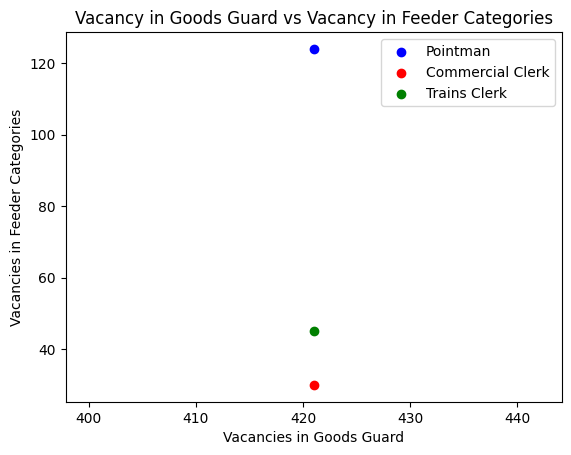

In [208]:
import matplotlib.pyplot as plt

# Vacancy information
vacancies = {
    "Goods Guard": 421,  # Replace with actual vacancy count for Goods Guard
    "Pointman": 124,    # Replace with actual vacancy count for Pointman
    "Commercial Clerk": 30,   # Replace with actual vacancy count for Commercial Clerk
    "Trains Clerk": 45,  # Replace with actual vacancy count for Trains Clerk
}

# Extract the vacancy counts from the vacancies dictionary
goods_guard_vacancies = vacancies["Goods Guard"]
pointman_vacancies = vacancies["Pointman"]
commercial_clerk_vacancies = vacancies["Commercial Clerk"]
trains_clerk_vacancies = vacancies["Trains Clerk"]

# Plotting the scatter plot
plt.scatter(goods_guard_vacancies, pointman_vacancies, color="blue", label="Pointman")
plt.scatter(goods_guard_vacancies, commercial_clerk_vacancies, color="red", label="Commercial Clerk")
plt.scatter(goods_guard_vacancies, trains_clerk_vacancies, color="green", label="Trains Clerk")

plt.xlabel("Vacancies in Goods Guard")
plt.ylabel("Vacancies in Feeder Categories")
plt.title("Vacancy in Goods Guard vs Vacancy in Feeder Categories")
plt.legend()

# Show the scatter plot
plt.show()
